In [1]:
import sys
sys.executable

'/usr/local/opt/python/bin/python3.7'

In [40]:
import numpy as np
import pandas as pd
from scipy.spatial import KDTree
import math

import matplotlib.pyplot as plt

from copy import deepcopy

In [41]:
# r_n function
def r(n, D):
    return n ** (-1/(2*D))

In [74]:
distances = []
counts = []

filename = 'slurm scripts/data/06-19-20/asymptotics-dim2_n50000-'

for i in range(1,6):
    f = open(filename+str(i)+'.out', "r")
    for line in f:
        distance = line.split()[0]
        count = line.split()[1]
        distances.append(float(distance))
        counts.append(int(count))
        
distances = np.array(distances)
counts = np.array(counts)

In [75]:
# T_n approaches 1.5 (true length) n^(1/4)

n = 50000
D = 2


In [76]:
lengths = deepcopy(distances)

In [77]:
lengths = lengths - (counts * (2/3) * r(n,D))

In [78]:
lengths = lengths * (counts ** (1/2))

In [79]:
lengths = lengths / (2/5)

In [80]:
lengths

array([ 0.75203601,  1.27089253,  1.27065942,  0.75213189,  1.76562132,
        1.27095701,  0.7523727 ,  1.27087046, -0.93951279, -0.93925995,
        0.75220342,  0.2132374 ,  0.21044914,  1.27106165,  1.27084474,
        0.75222639, -0.35376704,  0.75216878,  0.21046742, -0.93914314,
        0.21025451,  0.75269031, -0.93973684,  0.21027843,  1.27076361,
        0.21050156, -0.35380158,  1.27072298,  0.75218743,  0.2101931 ,
        1.27076304,  0.75235691, -0.35366461, -0.35397119,  0.21055008,
        1.27075476,  1.2707543 ,  1.76568581,  0.2102607 ,  0.75209184,
        0.75220312,  0.21074355, -0.35389331,  1.27102736,  1.7654708 ,
        1.27100154,  0.75203258,  0.21041903, -0.35384838,  1.27082164,
        1.27078612,  1.27070887,  0.21052738,  0.75209955,  1.27086555,
        1.27097292,  0.21034327,  0.210446  ,  0.21033327,  1.2708895 ,
        1.27071028,  0.75210761, -0.35345345,  0.21092522,  0.75284944,
        1.27094728,  0.75207837,  0.75249218,  1.76564358,  0.75

Text(0.5, 1.0, '50 bins')

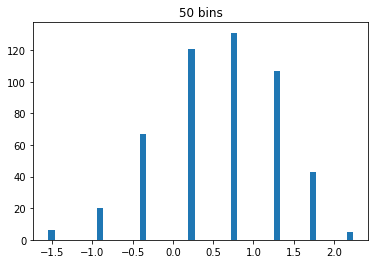

In [81]:
num = 50
plt.hist(lengths, bins=num)
plt.title(str(num) + ' bins')

In [52]:
lens = deepcopy(counts)

In [53]:
len(set(lens))

8

In [57]:
d = dict()
for i in set(lens):
    d[i] = []
    
for j in range(len(counts)):
    d[counts[j]].append(lengths[j])

In [58]:
d

{21: [0.7547032954358863,
  0.7547073649245422,
  0.7547265919223681,
  0.7547140753271313,
  0.7547496634813221],
 22: [0.5822606837845857,
  0.582281951261515,
  0.5822110454377459,
  0.5822680229383679,
  0.5823148848145022,
  0.5822672481154171,
  0.5822500906916973,
  0.5823578343175279,
  0.5823436943900787,
  0.5822660940542073,
  0.5824037386238862,
  0.5822297695485598,
  0.5823284262710818,
  0.5823392241568199,
  0.582249810679561,
  0.5823932312585844,
  0.582298147032156,
  0.5823206178934794,
  0.5822590602319646,
  0.5822754864226175,
  0.5822425585985963,
  0.58235362093526,
  0.5823388211558645,
  0.5822931973130806,
  0.5823113186131972,
  0.582364836687636,
  0.5822774115236614,
  0.5823992915340779,
  0.5822377264690182,
  0.5822803512526702,
  0.5824112651099534,
  0.5822976509158925,
  0.5823967744467,
  0.5823069217476651,
  0.582265605177712,
  0.5822213894023448,
  0.5822758527025175,
  0.582304795527326,
  0.5822287450318211,
  0.5823197615969941,
  0.58230694

In [59]:
for key in d.keys():
    print(str(key)+' '+str(np.mean(d[key])))

21 0.7547201982182501
22 0.582299310534638
23 0.4099003947716234
24 0.2375022038812946
25 0.0651152336644916
26 -0.10729295210383508
27 -0.2796830203705472
28 -0.4521400536143365


In [60]:
for key in d.keys():
    print(str(key)+' '+str(np.std(d[key])))

21 1.6715073765530896e-05
22 5.257694423905986e-05
23 6.239212398157586e-05
24 6.212656077633736e-05
25 0.00010068635046411825
26 6.309268329086257e-05
27 6.570008577562785e-05
28 2.336507327815363e-05
